### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

> <hr>

### Observações Implementação

In [ ]:
# esqueci completamente da parte do kernel kkkkkkk rindo de chorar

In [1]:
# passo a passo: reunião com o professor

# basicamente tudo é matriz, não preciso muito inicialmente preocupar com o plot dos clusters
# a variação dos valores na matriz vai me contar se deu certo ou errado
# lembrar que conceitos com nomes muito específicos, tipo protótipos, tão definidpos lá na tabelinha de conceitos

# PASSO A PASSO
# matriz com os dados, depende do dataset (NxP)
# aí tem a matriz U, com os valores de membership (NxK, sendo o número de clusters)
# tem a matriz de protótipos também (G)
# trabalhar com a função objetivo em função de U e de G 
# primeiro fixa U e encontra G, depois vai pro passo 2
# protótipos podem ser definidos com base nos dados iniciais, por mim ou aleatoriamente 
# a foto está no celular e tem anotações no caderno

### DATASET

> Permanece o mesmo por enquanto;

In [2]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [3]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

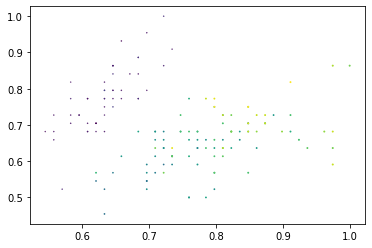

In [5]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

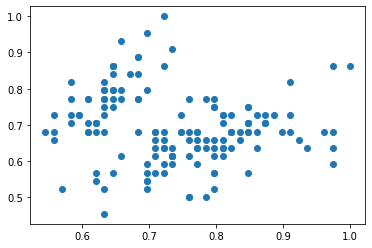

In [6]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

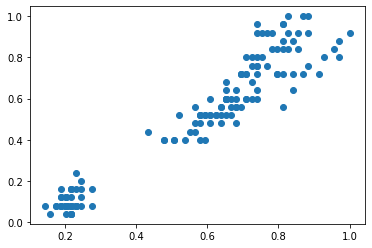

In [7]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### FUZZY C-MEANS

In [8]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [9]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [10]:
# number of clusters
K = 3
# fuziness valor 
m = 2
# membership
U = np.random.rand(iris_data_without_last_column.shape[0], K)
U # lembrando que os dados já foram normalizados

# protótipos

array([[0.93144453, 0.26042132, 0.66253535],
       [0.02110086, 0.2946457 , 0.16281358],
       [0.90019666, 0.09436443, 0.26742777],
       [0.75004719, 0.17125767, 0.11555604],
       [0.39273622, 0.94688071, 0.41860311],
       [0.47156411, 0.98706531, 0.61007417],
       [0.18643708, 0.06522896, 0.40017386],
       [0.47038334, 0.26113623, 0.72968529],
       [0.27921127, 0.27019402, 0.12186497],
       [0.14698899, 0.00594942, 0.59575329],
       [0.67473226, 0.36521655, 0.25045537],
       [0.00698745, 0.85287137, 0.0339617 ],
       [0.80842986, 0.62750378, 0.96297931],
       [0.33360268, 0.10472386, 0.1430227 ],
       [0.86599476, 0.62257411, 0.98194653],
       [0.4189897 , 0.78210713, 0.01142983],
       [0.62379749, 0.49227974, 0.82147725],
       [0.74948299, 0.20518062, 0.57042352],
       [0.11075398, 0.52071468, 0.82193273],
       [0.25175277, 0.53181243, 0.1609147 ],
       [0.88255849, 0.41447478, 0.31902909],
       [0.71174753, 0.94289235, 0.09874418],
       [0.

In [11]:
# calculo dos centroides
# envolve matriz
# soma da multiplicação de cada 

# precisamos de 3 centroides
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range (K):
        centroides[i,:] = np.sum((U[:, i] ** m)[:, np.newaxis] * iris_data_without_last_column, axis = 0)/np.sum(U[:, i] ** m)
    return centroides

In [12]:
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [13]:
def distancia_gaussiana(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a distância usando a função gaussiana entre as matrizes x e y.

    Parâmetros:
    - x, y: os pontos a serem comparados, sendo eles os dados e os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre x[i] e y[j].
    """
    print("Shapes em distancia_gaussiana:")
    print("x shape:", iris_data_without_last_column.shape)
    print("y shape:", centroides.shape)
    print()
    
    # tentando resolver o problema dimensional
    iris_data_without_last_column = iris_data_without_last_column.reshape(1, -1)
    
    #euclidiana = np.linalg.norm(iris_data_without_last_column[:, np.newaxis, :] - centroides, axis=1)  # Distâncias euclidianas entre todos os pares de pontos
    diferenca = iris_data_without_last_column - centroides
    euclidiana = np.sqrt(np.sum(diferenca**2))
    gaussian_values = np.exp(- (euclidiana**2) / (2 * sigma**2))  # Função gaussiana # dá pra escrever o sigma diferente se der erro
    return gaussian_values

In [14]:
def matriz_dg(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de distâncias usando a função gaussiana entre todos os pontos e os centroides.

    Parâmetros:
    - data: matriz representando os pontos a serem comparados.
    - centroides: matriz c/ os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre o ponto i e o centroide j.
    """
    print("Shapes em matriz_dg:")
    print("iris_data_without_last_column shape:", iris_data_without_last_column.shape)
    print("centroides shape:", centroides.shape)
    print()
    
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = distancia_gaussiana(iris_data_without_last_column[i], centroides[j], sigma)

    return distancias

In [15]:
sigma_value = 1.0
# Supondo que você já tenha definido K, U, m, sigma_value, iris_data_without_last_column e centroids

# Calcula a matriz de distâncias usando a função gaussian_distance_matrix
d_matriz = matriz_dg(iris_data_without_last_column, centroides, sigma_value)

# Exibe a matriz de distâncias
print("Matriz de Distâncias:")
print(d_matriz)

Shapes em matriz_dg:
iris_data_without_last_column shape: (150, 4)
centroides shape: (3, 4)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes em distancia_gaussiana:
x shape: (4,)
y shape: (4,)

Shapes 

In [16]:
#print(d_matriz) #supostamente, distância de cada ponto em relação a cada centroide

**OBSERVAÇÕES**
<br>uh to meio na dúvida aqui
<br> preciso que a distância seja calculada para cada ponto em relação a cada um dos centroides, mas não sei <br>se isso está acontecendo
<br>ACHO que é isso que está rolando sim

In [21]:
def membership_c (iris_data_without_last_column, centroides, K, m):
    U_novo = np.zeros_like(d_matriz)
    # iterar sobre K
    for i in range(K):
        U_novo[:, i] = d_matriz[:, i]

    U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
    return U_novo

# Ou simplesmente copiar todos os valores da matriz de distâncias para U_novo (?)
#U_novo = d_matriz.copy()

In [22]:
#U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
#U_novo

U_novo = membership_c(iris_data_without_last_column, centroides, K, m)

In [23]:
labels = np.argmax(U_novo, axis = 1)
labels
# class of each dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

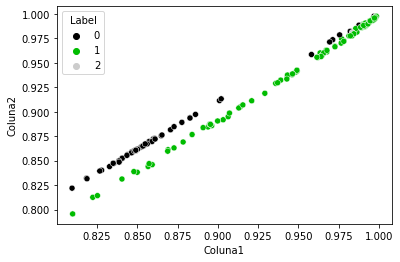

In [24]:
# Crie um DataFrame para o gráfico de dispersão
df_plot = pd.DataFrame({'Coluna1': d_matriz[:, 0], 'Coluna2': d_matriz[:, 1], 'Label': labels})

# Crie o gráfico de dispersão usando Seaborn
sns.scatterplot(data = df_plot, x='Coluna1', y='Coluna2', hue='Label', palette='nipy_spectral')

# Exiba o gráfico
plt.show()

In [ ]:
# ayo ladies and gentlemen
# tá muito bão esse aí não né, não enxergo as cinzas caso elas existam

In [30]:
max_iteration = 100
for iteration in range(max_iteration): 
    centroides = calculando_centroides(iris_data_without_last_column, K, U, m)
    U_novo = membership_c(iris_data_without_last_column, centroides, K, m)
    
    labels = np.argmax(U_novo, axis = 1)
    
    if np.linalg.norm (U_novo - U) <= 0.00001:
        break 
    U = U_novo
    
    labels = np.argmax(U_novo, axis = 1)

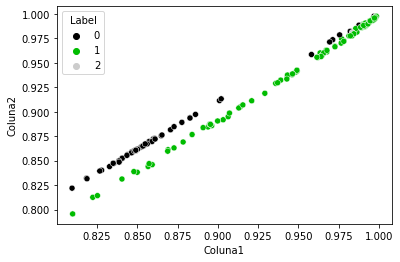

In [31]:
sns.scatterplot(data = df_plot, x='Coluna1', y='Coluna2', hue='Label', palette='nipy_spectral')

# Exiba o gráfico
plt.show()

era pra mudar algo mona :(
<br>acho que preciso mudar como chamo o scatter

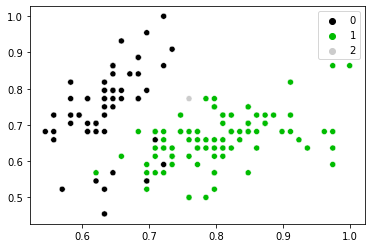

In [32]:
sns.scatterplot(data = iris_data_without_last_column, x=iris_data_without_last_column[:, 0], y=iris_data_without_last_column[:, 1], hue= labels, palette='nipy_spectral')

# Exiba o gráfico
plt.show()